In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tueplots import bundles

from definitions import load_users_csv, load_caracteristics_csv


plt.rcParams.update(bundles.neurips2021(usetex=False))

data_users = load_users_csv()
data_caracteristics = load_caracteristics_csv()

#print(data_users.head())
#print(data_users[['Num_Acc', 'grav']].head())




grav    0      10     50    100
an                             
5     80272  70891  40792  5543
6     76163  64111  41869  4942
7     76910  66955  39754  4838
8     69612  60726  36179  4443
9     67806  59207  34506  4443
10    62847  55836  31337  4172
11    60560  53237  30635  4111
12    56577  50102  28107  3842
13    52622  45750  26895  3427
14    53487  47640  27502  3557
15    53378  45667  27717  3616
16    54640  46751  28376  3655
Index(['Unscathed', 'Lightly Injured', 'Hospitalized', 'Killed'], dtype='object', name='Severity')


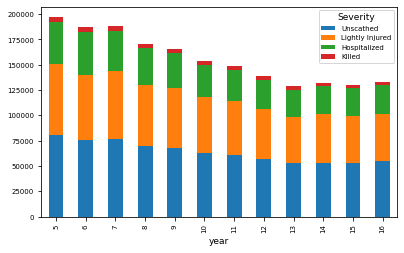

In [20]:
severity_by_year = pd.merge(data_users[['Num_Acc', 'grav']],
                            data_caracteristics[['Num_Acc', 'an']],
                            how="left",
                            on=['Num_Acc', 'Num_Acc'])

#print(severity_by_year.head())

res = severity_by_year[['grav', 'an']].groupby(['an']).value_counts().reset_index()
#print(severity_by_year[['grav', 'an']].groupby(['an']))

#print(res.dtype)
#print(res.shape)

#res_frame.pivot(index='an', columns='grav')
#print(res_frame)
#print(res_frame.shape)
res = res.pivot(index='an', columns='grav', values=0)

print(res)
res = res.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})
res.columns.name = 'Severity'
print(res.columns)
res.plot(kind='bar', stacked=True, xlabel='year')
plt.savefig('..//Plots//Accidents_per_year_and_severity.pdf', format='pdf')
plt.show()

In [1]:
import pandas as pd

print(pd.__version__)

1.4.0
